# Application of Groverabs algorithm 

## Excercise 

Build a quantum cirvuit to recognize the string "101" using Grover's algorithm

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np
from matplotlib import pyplot as plt


In [2]:
qc = QuantumCircuit(3, 3) # defines a circuit with 3 qubits and 3 classical bits 

- Applying Hadamard to all qubits generates all the $2^8$ states $|s>$

In [3]:
qc.h([0,1,2])

- In the oracle we flip the second bit before the contro-Z beacause the contro-Z put "-" on the string |111> 
- Gate Z in done applying hadamard (H) before and after the control not 

In [4]:
def apply_oracle(qc):

    qc.x(1) 

    # Gate Z 
    qc.h(2) 
    qc.ccx(0, 1, 2)  # 0,1 as control 2 is the target 
    qc.h(2)

    qc.x(1)

In [5]:
def apply_diffusion(qc):
    # Apply Hadamard gates to all qubits
    qc.h([0, 1, 2])

    # Apply X gates to all qubits
    qc.x([0, 1, 2])

    # Apply multi-controlled Z gate
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)

    # Apply X gates and Hadamard gates to complete the diffusion operator
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])

In [6]:
n_iterations = int(np.pi / 4 * np.sqrt(2 ** 3))  # numbers needed to coverge to solution

In [7]:
for _ in range(n_iterations):
    qc.barrier(label="oracle")
    apply_oracle(qc)
    qc.barrier(label="diffusor")
    apply_diffusion(qc)

qc.barrier(label='measure')
qc.measure([0,1,2], [0,1,2])

print(qc.draw())

     ┌───┐ oracle                 diffusor ┌───┐┌───┐          ┌───┐┌───┐     »
q_0: ┤ H ├───░───────────■───────────░─────┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────»
     ├───┤   ░    ┌───┐  │  ┌───┐    ░     ├───┤├───┤       │  ├───┤├───┤     »
q_1: ┤ H ├───░────┤ X ├──■──┤ X ├────░─────┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────»
     ├───┤   ░    ├───┤┌─┴─┐├───┤    ░     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐»
q_2: ┤ H ├───░────┤ H ├┤ X ├┤ H ├────░─────┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
     └───┘   ░    └───┘└───┘└───┘    ░     └───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«      oracle                 diffusor ┌───┐┌───┐          ┌───┐┌───┐     »
«q_0: ───░───────────■───────────░─────┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────»
«        ░    ┌───┐  │  ┌───┐    ░     ├───┤├───┤       │  ├───┤├───┤     »
«q_1: ───░────┤ X ├──■──┤ X ├────░─────┤ H ├┤ X ├───

{'000': 8, '010': 9, '100': 8, '001': 11, '110': 5, '111': 3, '011': 16, '101': 964}


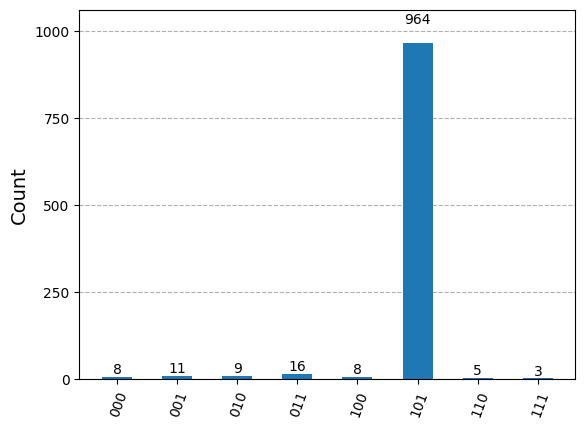

In [8]:
# Run the simulation
simulator = AerSimulator()
compiled_c = transpile(qc, simulator)
sim_result = simulator.run(compiled_c).result()
counts = sim_result.get_counts()


# Show the results
print(counts)
plot_histogram(counts)

# Prob of the solution varying the number of iterations

In [13]:
def grover_circuit(n_iterations):
    qc = QuantumCircuit(3, 3)
    qc.h([0,1,2])

    for _ in range(n_iterations):
        apply_oracle(qc)
        apply_diffusion(qc)

    qc.measure([0,1,2], [0,1,2])
    return qc

In [16]:
simulator = AerSimulator()
target_state = '101'
max_iterations = 10
probabilities = []

for i in range(max_iterations):
    qc = grover_circuit(i)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()

    # Compute the probability of the target state 
    prob_target = counts.get(target_state, 0) / sum(counts.values())
    probabilities.append(prob_target)

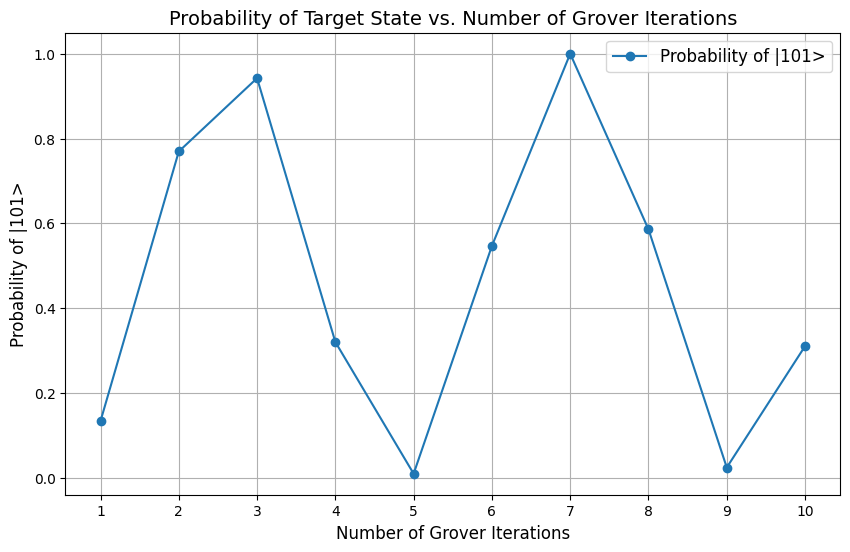

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_iterations + 1), probabilities, marker='o', label='Probability of |101>')
plt.title('Probability of Target State vs. Number of Grover Iterations', fontsize=14)
plt.xlabel('Number of Grover Iterations', fontsize=12)
plt.ylabel('Probability of |101>', fontsize=12)
plt.grid()
plt.xticks(range(1, max_iterations + 1 ))
plt.legend(fontsize=12)
plt.show()